In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("../scripts/coord_checks/mup_adam_lr.csv")
df2 = pd.read_csv("../scripts/coord_checks/sp_adam_lr.csv")

df1["log_loss"] = np.log(df1["loss"])
df2["log_loss"] = np.log(df2["loss"])

df1["width"] = df1["key"].apply(lambda x: x.split("_")[0].split("=")[1])
df1["seq_len"] = df1["key"].apply(lambda x: x.split("_")[1].split("=")[1])
df1["batch_size"] = df1["key"].apply(lambda x: x.split("_")[2].split("=")[1])

df2["width"] = df2["key"].apply(lambda x: x.split("_")[0].split("=")[1])
df2["seq_len"] = df2["key"].apply(lambda x: x.split("_")[1].split("=")[1])
df2["batch_size"] = df2["key"].apply(lambda x: x.split("_")[2].split("=")[1])

In [3]:
def plot_single_lineplot(item, x='log2lr', y='log_loss', hue='key',
                         xlim=(-15, 0), ylim=(1.5, 4), figsize=(5, 3), face_color=None,
                         loglog=False, logbase=2, title=None):
    sns.set()
    fig, ax = plt.subplots(figsize=figsize)
    
    if face_color is not None:
        fig.patch.set_facecolor(face_color)

    sns.lineplot(x=x, y=y, hue=hue, data=item, palette="flare", ax=ax)

    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    if loglog:
        ax.set_xscale('log', base=logbase)
        ax.set_yscale('log', base=logbase)

    if title:
        fig.suptitle(title)
        
    # 凡例を右外に移動
    legend = ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title=hue)
    legend.get_frame().set_facecolor('white')  # ← 背景を白に設定
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 上部にタイトルを確保

    plt.show()
    return fig

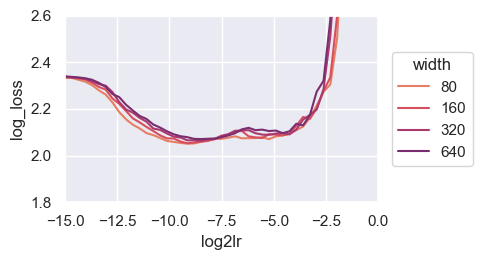

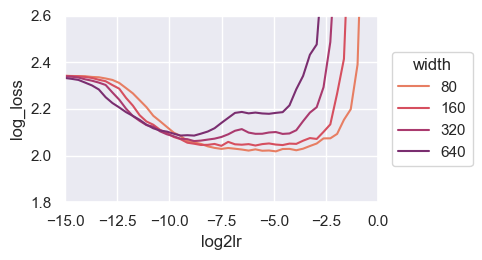

In [4]:
plot_single_lineplot(df1, xlim=(-15, 0), ylim=(1.8, 2.6), hue="width")
plot_single_lineplot(df2, xlim=(-15, 0), ylim=(1.8, 2.6), hue="width");